# Comp4331 Assignment 1

## Preparing the dataset

In [51]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn

In [52]:
# Please ensure the file "forestfires.csv" is under current directory
data_file = "forestfires.csv"

In [53]:
data_df = pd.read_csv(data_file, sep=',')

In [54]:
data_df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


## Task 1. Basic summary


1. Report the mean, standard deviation, mode, median, and the five-number summary of the attributes RH and wind.

In [55]:
print("Summary Statistics for RH")
print(f"mean: {data_df['RH'].describe()[1]}")
print(f"standard deviation: {data_df['RH'].describe()[2]}")
print(f"mode: {data_df['RH'].mode().iloc[0]}")
print(f"median: {data_df['RH'].median()}")
print(f"five number summary: \n{data_df['RH'].describe()[3:]}\n")

print("Summary Statistics for wind")
print(f"mean: {data_df['wind'].describe()[1]}")
print(f"standard deviation: {data_df['wind'].describe()[2]}")
print(f"mode: {data_df['wind'].mode().iloc[0]}")
print(f"median: {data_df['wind'].median()}")
print(f"five number summary: \n{data_df['wind'].describe()[3:]}")

Summary Statistics for RH
mean: 44.28820116054158
standard deviation: 16.31746923937841
mode: 27
median: 42.0
five number summary: 
min     15.0
25%     33.0
50%     42.0
75%     53.0
max    100.0
Name: RH, dtype: float64

Summary Statistics for wind
mean: 4.017601547388782
standard deviation: 1.7916526009464617
mode: 2.2
median: 4.0
five number summary: 
min    0.4
25%    2.7
50%    4.0
75%    4.9
max    9.4
Name: wind, dtype: float64


## Task 2. Box plot

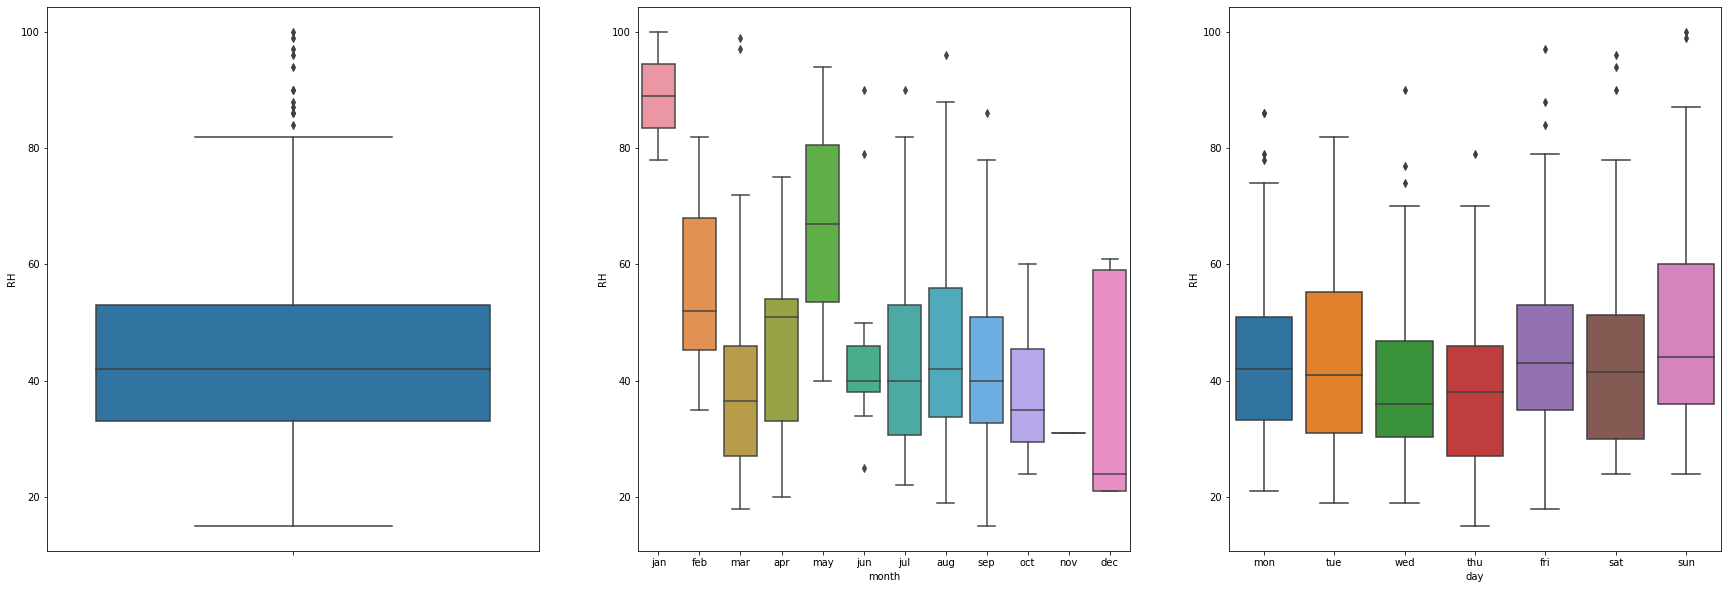

In [56]:
fig, axes = plt.subplots(1, 3, figsize = (30,10))

sns.boxplot(data = data_df, y = 'RH', ax = axes[0])
sns.boxplot(data = data_df, x='month', y = 'RH', order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
                                                          'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ax = axes[1])
sns.boxplot(data = data_df, x='day', y = 'RH', order = ['mon', 'tue', 'wed', 'thu',
                                                        'fri', 'sat', 'sun'], ax = axes[2])

## Task 3. Hist plot

[Text(0.5, 1.0, 'RH')]

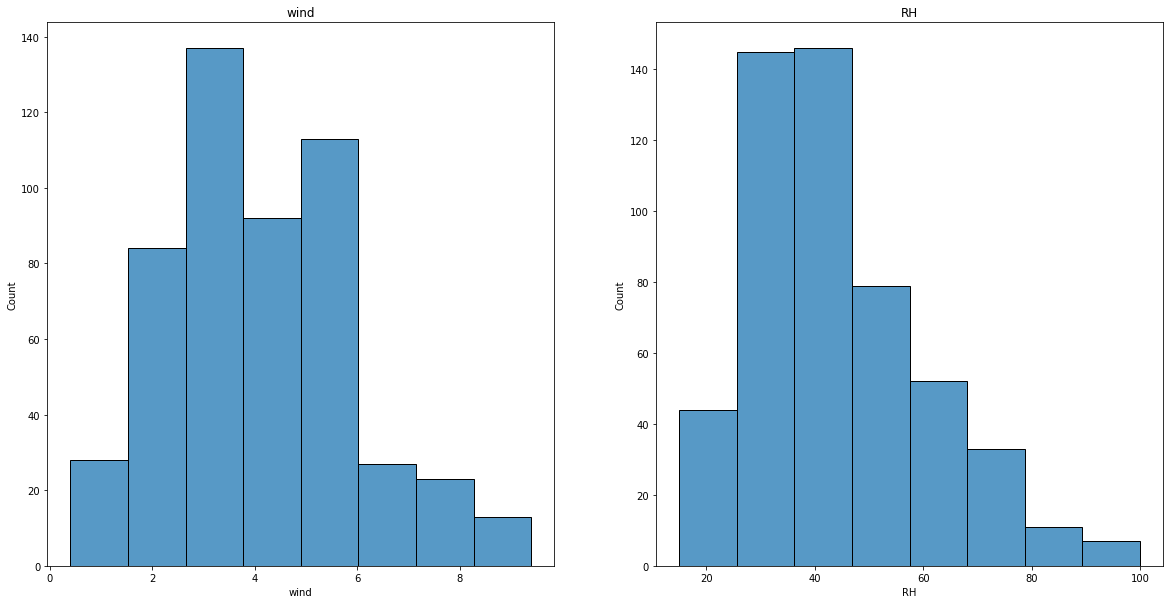

In [57]:
fig, axes = plt.subplots(1, 2, figsize = (20,10))

sns.histplot(data = data_df, x='wind', bins = 8, ax = axes[0]).set(title = "wind")
sns.histplot(data = data_df, x='RH', bins = 8, ax = axes[1]).set(title = "RH")

# Task 4. Scatter plot

          area      wind
area  1.000000  0.012317
wind  0.012317  1.000000


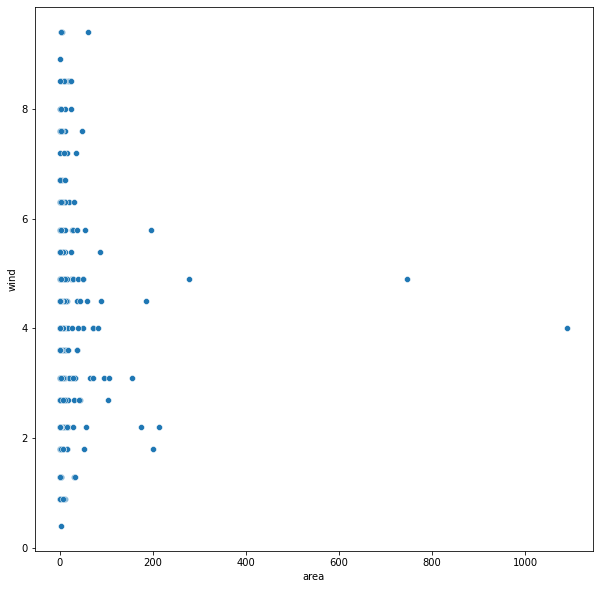

In [58]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = data_df, x = 'area', y='wind')
print(data_df[['area','wind']].corr(method = 'pearson'))

## Task 5. Correlation

In [59]:
print(data_df[['area','FFMC']].corr(method = 'pearson'))
print(data_df[['area','DMC']].corr(method = 'pearson'))
print(data_df[['area','DC']].corr(method = 'pearson'))
print(data_df[['area','ISI']].corr(method = 'pearson'))
print(data_df[['area','RH']].corr(method = 'pearson'))
print(data_df[['area','wind']].corr(method = 'pearson'))

          area      FFMC
area  1.000000  0.040122
FFMC  0.040122  1.000000
          area       DMC
area  1.000000  0.072994
DMC   0.072994  1.000000
          area        DC
area  1.000000  0.049383
DC    0.049383  1.000000
          area       ISI
area  1.000000  0.008258
ISI   0.008258  1.000000
          area        RH
area  1.000000 -0.075519
RH   -0.075519  1.000000
          area      wind
area  1.000000  0.012317
wind  0.012317  1.000000


In [60]:
FFMC_corr = abs(data_df[['area','FFMC']].corr(method = 'pearson').iloc[0,1])
FFMC_corr

0.0401220041586204

In [61]:
RH_corr = abs(data_df[['area','RH']].corr(method = 'pearson').iloc[0,1])
RH_corr

0.07551856346988933

In [62]:
FFMC_corr = abs(data_df[['area','FFMC']].corr(method = 'pearson').iloc[0,1])
DMC_corr = abs(data_df[['area','DMC']].corr(method = 'pearson').iloc[0,1])
DC_corr = abs(data_df[['area','DC']].corr(method = 'pearson').iloc[0,1])
ISI_corr = abs(data_df[['area','ISI']].corr(method = 'pearson').iloc[0,1])
RH_corr = abs(data_df[['area','RH']].corr(method = 'pearson').iloc[0,1])
wind_corr = abs(data_df[['area','wind']].corr(method = 'pearson').iloc[0,1])

key_dict = ['FFMC_corr', 'DMC_corr', 'DC_corr', 'ISI_corr', 'RH_corr', 'wind_corr']
val_dict = [FFMC_corr, DMC_corr, DC_corr, ISI_corr, RH_corr, wind_corr]
corr_dict = {}

for key, value in zip(key_dict, val_dict):
  corr_dict[key] = value

corr_dict = sorted(corr_dict.items(), key=lambda x: x[1], reverse=True)
top3_dict = corr_dict[:3]

for key, value in top3_dict:
  print(f'{key}:\t{value}')

RH_corr:	0.07551856346988933
DMC_corr:	0.07299429625105723
DC_corr:	0.04938322529891621


RH, DMC, and DC are the top 3 attributes that are most correlated (either positively or negatively) with area.

# Task 6. $\chi^2$-test



In [63]:
temp_mean = data_df['temp'].mean()
wind_mean = data_df['wind'].mean()
print(f'temp mean: {temp_mean}\twind mean: {wind_mean}')
data_df['temp_ge_mean'] = data_df['temp'] >= temp_mean
data_df['wind_ge_mean'] = data_df['wind'] >= wind_mean

crosstab = pd.crosstab(data_df['temp_ge_mean'], data_df['wind_ge_mean'])

chi2, p, dof, _ = scipy.stats.chi2_contingency(crosstab)
print(f'chi^2: {chi2}\tp: {p}\tdof: {dof}')

print(crosstab)
print('the attributes temp and wind independent of each other')

temp mean: 18.88916827852998	wind mean: 4.017601547388782
chi^2: 4.6248223286218	p: 0.031512524845180044	dof: 1
wind_ge_mean  False  True
temp_ge_mean             
False           125   112
True            175   105
the attributes temp and wind independent of each other


In [64]:
X_mean = data_df['X'].mean()
Y_mean = data_df['Y'].mean()
print(f'X mean: {X_mean}\tY mean: {Y_mean}')
data_df['X_ge_mean'] = data_df['X'] >= X_mean
data_df['Y_ge_mean'] = data_df['Y'] >= Y_mean

crosstab = pd.crosstab(data_df['X_ge_mean'], data_df['Y_ge_mean'])

chi2, p, dof, _ = scipy.stats.chi2_contingency(crosstab)
print(f'chi^2: {chi2}\tp: {p}\tdof: {dof}')

print(crosstab)
print('the attributes X and Y are dependent of each other')

X mean: 4.669245647969052	Y mean: 4.299806576402321
chi^2: 46.3841585605598	p: 9.719816977512204e-12	dof: 1
Y_ge_mean  False  True
X_ge_mean             
False        199    68
True         112   138
the attributes X and Y are dependent of each other


## Task 7. Normalization

In [65]:
from sklearn import preprocessing


scaler = preprocessing.MinMaxScaler(feature_range =(0,1))
data_df['FFMC_minmax_scaled'] = scaler.fit_transform(data_df[['FFMC']])
data_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,temp_ge_mean,wind_ge_mean,X_ge_mean,Y_ge_mean,FFMC_minmax_scaled
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,False,True,True,True,0.870968
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,False,False,True,False,0.927742
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,False,False,True,False,0.927742
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,False,False,True,True,0.941935
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,False,False,True,True,0.910968


In [66]:
scaler = preprocessing.StandardScaler()

data_df['DC_z_scaled'] = scaler.fit_transform(data_df[['DC']])
data_df['ISI_z_scaled'] = scaler.fit_transform(data_df[['ISI']])
data_df['temp_z_scaled'] = scaler.fit_transform(data_df[['temp']])
data_df['RH_z_scaled'] = scaler.fit_transform(data_df[['RH']])
data_df['wind_z_scaled'] = scaler.fit_transform(data_df[['wind']])

data_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,temp_ge_mean,wind_ge_mean,X_ge_mean,Y_ge_mean,FFMC_minmax_scaled,DC_z_scaled,ISI_z_scaled,temp_z_scaled,RH_z_scaled,wind_z_scaled
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,...,False,True,True,True,0.870968,-1.830477,-0.860946,-1.842640,0.411724,1.498614
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,...,False,False,True,False,0.927742,0.488891,-0.509688,-0.153278,-0.692456,-1.741756
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,...,False,False,True,False,0.927742,0.560715,-0.509688,-0.739383,-0.692456,-1.518282
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,...,False,False,True,True,0.941935,-1.898266,-0.004756,-1.825402,3.233519,-0.009834
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,...,False,False,True,True,0.910968,-1.798600,0.126966,-1.291012,3.356206,-1.238940


In [67]:
output_df = data_df.iloc[:,-6:]
output_df.to_csv("data_normalized.csv", sep = ",", header = True)

## Task 8. PCA

In [68]:
pca_df = output_df.iloc[:,1:]
pca_df

,DC_z_scaled,ISI_z_scaled,temp_z_scaled,RH_z_scaled,wind_z_scaled
0,-1.830477,-0.860946,-1.842640,0.411724,1.498614
1,0.488891,-0.509688,-0.153278,-0.692456,-1.741756
2,0.560715,-0.509688,-0.739383,-0.692456,-1.518282
3,-1.898266,-0.004756,-1.825402,3.233519,-0.009834
4,-1.798600,0.126966,-1.291012,3.356206,-1.238940
...,...,...,...,...,...
512,0.474768,-1.563460,1.536084,-0.753800,-0.736124
513,0.474768,-1.563460,0.519019,1.638592,0.995798
514,0.474768,-1.563460,0.398350,1.577248,1.498614
515,0.269382,0.500176,1.156839,-0.140366,-0.009834


In [69]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(pca_df)
eignvalue = pca.explained_variance_
cum_explained_ratio = pca.explained_variance_ratio_.cumsum()

print(f'eignvalue: {eignvalue}\ncumulative explained ratio: {cum_explained_ratio}')

eignvalue: [2.01883108 1.11358567 0.98519395 0.62366511 0.2684141 ]
cumulative explained ratio: [0.40298524 0.62527158 0.82192925 0.94642101 1.        ]


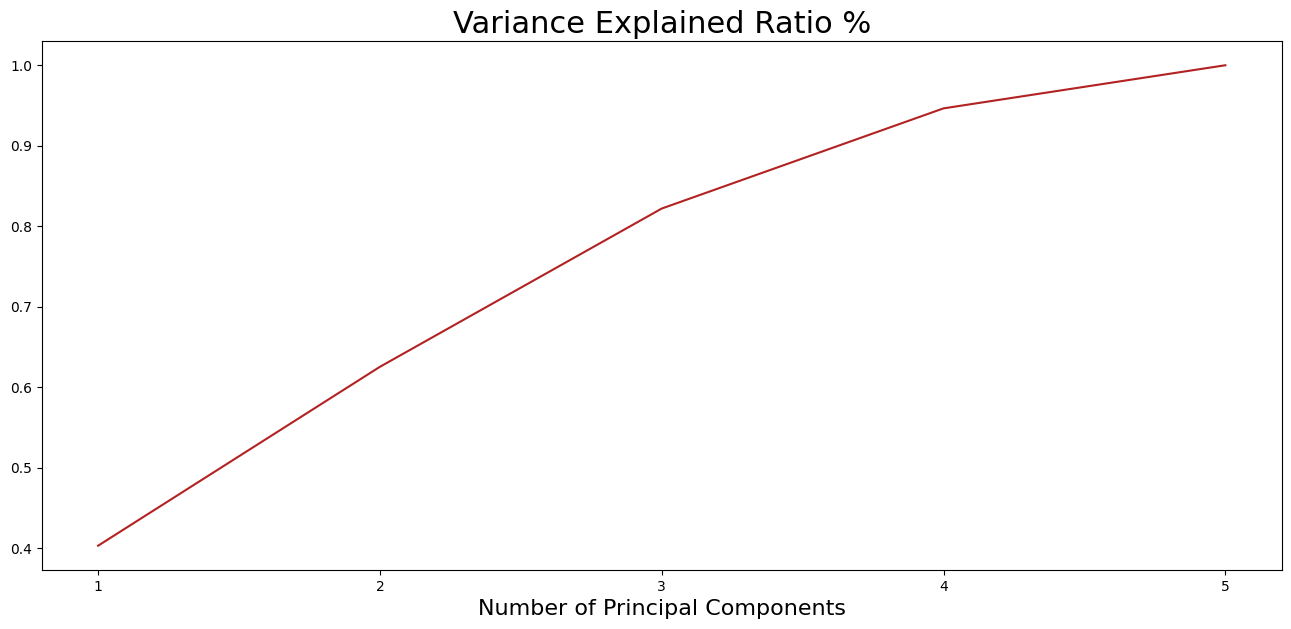

In [70]:
fig, axes = plt.subplots(1,1, figsize=(16,7), dpi=100)
plt.plot(range(1,6), cum_explained_ratio, color = 'firebrick')
plt.title('Variance Explained Ratio %', fontsize=22)
plt.xlabel('Number of Principal Components', fontsize=16)
axes.set_xticks([1,2,3,4,5])


In [71]:
pca_df.head()

,DC_z_scaled,ISI_z_scaled,temp_z_scaled,RH_z_scaled,wind_z_scaled
0,-1.830477,-0.860946,-1.842640,0.411724,1.498614
1,0.488891,-0.509688,-0.153278,-0.692456,-1.741756
2,0.560715,-0.509688,-0.739383,-0.692456,-1.518282
3,-1.898266,-0.004756,-1.825402,3.233519,-0.009834
4,-1.798600,0.126966,-1.291012,3.356206,-1.238940


In [72]:
pca_4 = PCA(n_components = 4)
pca4_result = pca_4.fit_transform(pca_df)

pca4_df = pd.DataFrame(pca4_result, columns = ["PC1", "PC2", "PC3", "PC4"])
pca4_df.head()

,PC1,PC2,PC3,PC4
0,2.870774,1.038181,-0.737692,-0.148180
1,-0.611544,-1.673690,-0.506513,0.295610
2,-0.217798,-1.520256,-0.397966,0.191054
3,3.400801,-0.095649,1.557776,1.614286
4,2.735682,-1.035390,1.632195,2.279629


In [73]:
print(f"PC1 five number summary: \n{pca4_df['PC1'].describe()[3:]}\n")
print(f"PC2 five number summary: \n{pca4_df['PC2'].describe()[3:]}\n")
print(f"PC3 five number summary: \n{pca4_df['PC3'].describe()[3:]}\n")
print(f"PC4 five number summary: \n{pca4_df['PC4'].describe()[3:]}")

PC1 five number summary: 
min   -3.510805
25%   -0.954405
50%   -0.314964
75%    0.901589
max    4.429676
Name: PC1, dtype: float64

PC2 five number summary: 
min   -2.667774
25%   -0.812584
50%   -0.139537
75%    0.761491
max    6.145161
Name: PC2, dtype: float64

PC3 five number summary: 
min   -2.684707
25%   -0.646481
50%    0.017439
75%    0.631519
max    3.627755
Name: PC3, dtype: float64

PC4 five number summary: 
min   -1.944936
25%   -0.476939
50%   -0.054728
75%    0.480855
max    7.019783
Name: PC4, dtype: float64


In [82]:
pca4_df.to_csv('data_reduced.csv',sep = ',', header = False)

## Task 9. Missing values

reloading the dataset

In [75]:
data_df = pd.read_csv(data_file, sep=',')

In [76]:
def Average(lst):
    return sum(lst) / len(lst)

In [77]:
area_list = data_df.area.tolist()
area_list = list(filter(lambda a: a != 0.0, area_list))
area_avg = Average(area_list)
data_df['area'] = data_df['area'].replace(0.0, area_avg)

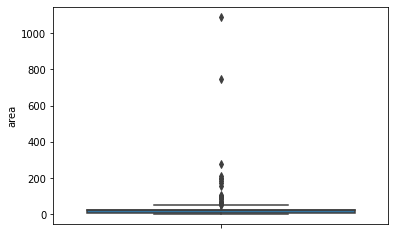

In [78]:
sns.boxplot(data = data_df, y = 'area')

In [79]:
print(data_df[['area','wind']].corr(method = 'pearson'))

          area      wind
area  1.000000  0.001584
wind  0.001584  1.000000
